# Student exam score dataset

In [ ]:
Marks Range 	Grade	Grade Point
91-100	        A1	         10.0
81-90	        A2	         9.0
71-80	        B1	         8.0
61-70	        B2	         7.0
51-60	        C1	         6.0
41-50	        C2	         5.0
33-40	        D	         4.0
21-32	        E1	         0.0
00-20	        E2	         0.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('student_exam_scores.csv')

In [8]:
df=pd.DataFrame(data)

In [9]:
df_copy=df.copy()

In [11]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [14]:
df.shape

(200, 6)

In [17]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [19]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [21]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [23]:
df['hours_studied'].value_counts()

3.9     7
3.5     6
10.5    5
3.4     5
8.1     4
       ..
1.7     1
8.9     1
7.6     1
6.5     1
10.2    1
Name: hours_studied, Length: 96, dtype: int64

<AxesSubplot:>

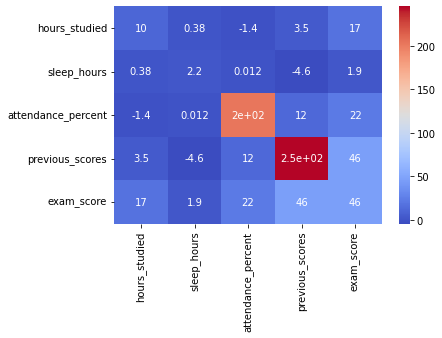

In [277]:
sns.heatmap(df.cov(), annot=True, cmap='coolwarm')

# FEATURE ENGINEERING

In [25]:
df['hours_studied'].describe()

count    200.000000
mean       6.325500
std        3.227317
min        1.000000
25%        3.500000
50%        6.150000
75%        9.000000
max       12.000000
Name: hours_studied, dtype: float64

In [31]:
hours=[1,3,6,9,12]
hours_label=['1 to 3 hours','4 to 6 hours', '7 to 9 hours','10 to 12 hours']
df['hours_study']=pd.cut(df['hours_studied'],hours,labels=hours_label,include_lowest=True)

In [35]:
df['hours_study'].value_counts()

4 to 6 hours      64
7 to 9 hours      52
10 to 12 hours    49
1 to 3 hours      35
Name: hours_study, dtype: int64

In [38]:
sleep=[4,5,7,9]
sleep_label=['4 to 5 hours', '6 to 7 hours', 'More than 7 hours']


In [39]:
df['sleep_pattern']=pd.cut(df['sleep_hours'],sleep,labels=sleep_label,include_lowest=True)

In [41]:
df['sleep_pattern'].value_counts(normalize=True)*100

More than 7 hours    42.5
6 to 7 hours         39.5
4 to 5 hours         18.0
Name: sleep_pattern, dtype: float64

In [46]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,hours_study,sleep_pattern
0,S001,8.0,8.8,72.1,45,30.2,7 to 9 hours,More than 7 hours
1,S002,1.3,8.6,60.7,55,25.0,1 to 3 hours,More than 7 hours
2,S003,4.0,8.2,73.7,86,35.8,4 to 6 hours,More than 7 hours
3,S004,3.5,4.8,95.1,66,34.0,4 to 6 hours,4 to 5 hours
4,S005,9.1,6.4,89.8,71,40.3,10 to 12 hours,6 to 7 hours


In [44]:
df['previous_scores'].describe()

count    200.000000
mean      66.800000
std       15.663869
min       40.000000
25%       54.000000
50%       67.500000
75%       80.000000
max       95.000000
Name: previous_scores, dtype: float64

In [45]:
df['exam_score'].describe()

count    200.000000
mean      33.955000
std        6.789548
min       17.100000
25%       29.500000
50%       34.050000
75%       38.750000
max       51.300000
Name: exam_score, dtype: float64

In [47]:
marks=[0,20,32,40,50,60,70,80,90,100]
marks_label=['0 to 20: E2','21 to 32: E1', '33 to 40: D','41 to 50: C2','51 to 60: C1','61 to 70: B2','71 to 80: B1','81 to 90: A2','91 to 100: A1']

df['previous_scores_range']=pd.cut(df['previous_scores'],marks,labels=marks_label, include_lowest=True)
df['exam_range']=pd.cut(df['exam_score'],marks,labels=marks_label, include_lowest=True)



# EXPLORATORY DATA ANALYSIS

In [48]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,hours_study,sleep_pattern,previous_scores_range,exam_range
0,S001,8.0,8.8,72.1,45,30.2,7 to 9 hours,More than 7 hours,41 to 50: C2,21 to 32: E1
1,S002,1.3,8.6,60.7,55,25.0,1 to 3 hours,More than 7 hours,51 to 60: C1,21 to 32: E1
2,S003,4.0,8.2,73.7,86,35.8,4 to 6 hours,More than 7 hours,81 to 90: A2,33 to 40: D
3,S004,3.5,4.8,95.1,66,34.0,4 to 6 hours,4 to 5 hours,61 to 70: B2,33 to 40: D
4,S005,9.1,6.4,89.8,71,40.3,10 to 12 hours,6 to 7 hours,71 to 80: B1,41 to 50: C2


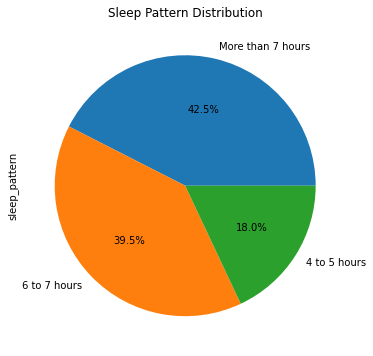

In [121]:
plt.figure(figsize=(10, 6))
df['sleep_pattern'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Sleep Pattern Distribution')
plt.show()

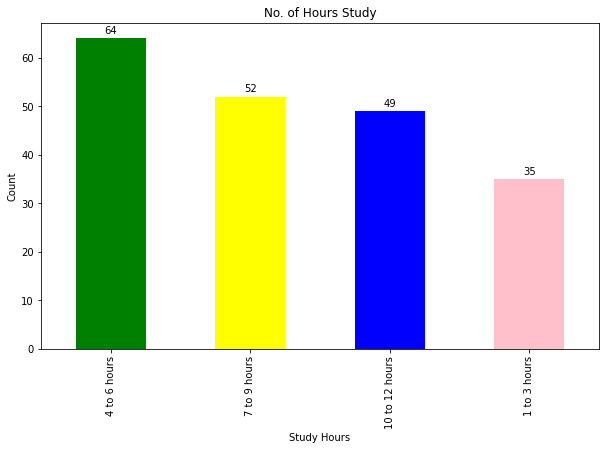

In [137]:
plt.figure(figsize=(10,6))
color=['green','yellow','blue','pink']
hours_study=df['hours_study'].value_counts()
hours_study.plot(kind='bar', color=color)
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.title('No. of Hours Study')


for i,val in enumerate(hours_study):
    plt.text(i,val+1,str(val),ha='center')

plt.show()


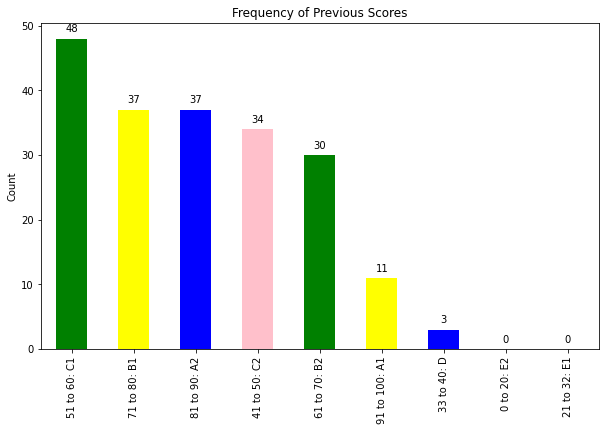

In [217]:
plt.figure(figsize=(10, 6))
color=['green','yellow','blue','pink']
Previous_Scores_Range=df['previous_scores_range'].value_counts().sort_values(ascending=False)
Previous_Scores_Range.plot(kind='bar',color=color)

plt.title('Frequency of Previous Scores')
plt.ylabel('Count')


for i,val in enumerate(Previous_Scores_Range):
    plt.text(i,val+1,str(val),ha='center')


plt.show()

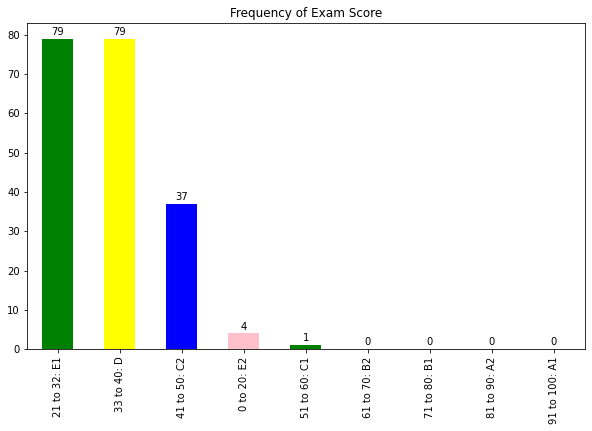

In [219]:
plt.figure(figsize=(10, 6))
color=['green','yellow','blue','pink']
Exam_Range=df['exam_range'].value_counts().sort_values(ascending=False)
Exam_Range.plot(kind='bar',color=color)
plt.title('Frequency of Exam Score')

for i,val in enumerate(Exam_Range):
    plt.text(i,val+1,str(val),ha='center')

plt.show()

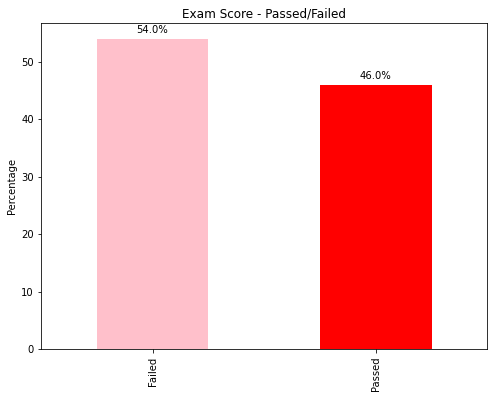

In [188]:
test_exam_result=[1,33,60]
test_exam_result_labels=['Passed','Failed']
df['exam_result']=pd.cut(df['exam_score'],test_exam_result,labels=test_exam_result_labels, include_lowest=True)

plt.figure(figsize=(8, 6))
color=['pink','red']
exam_result=df['exam_result'].value_counts(normalize=True).mul(100)
exam_result.plot(kind='bar',color=color)
plt.title('Exam Score - Passed/Failed')
plt.ylabel('Percentage')
for i,val in enumerate(exam_result):
    plt.text(i,val+1,f'{val:.1f}%',ha='center')

plt.show()

# Multi-variate Analysis

<Figure size 1080x432 with 0 Axes>

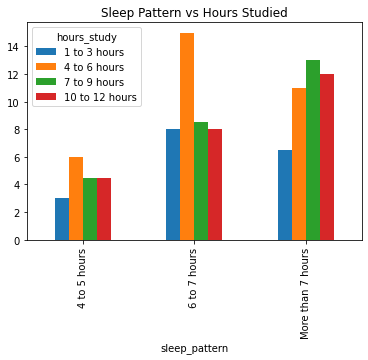

In [221]:
plt.figure(figsize=(15, 6))
sleep_vs_hours=pd.crosstab(df['sleep_pattern'],df['hours_study'],normalize=True).mul(100)
sleep_vs_hours.plot(kind='bar')
plt.title('Sleep Pattern vs Hours Studied')
plt.show()


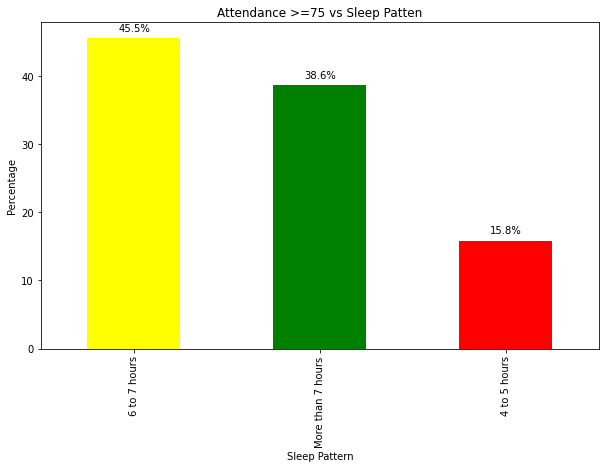

In [120]:
plt.figure(figsize=(10, 6))
color=['yellow','green','red']
attendance_vs_sleep_pattern=df[df['attendance_percent']>=75]['sleep_pattern'].value_counts(normalize=True).mul(100)
attendance_vs_sleep_pattern.plot(kind='bar',color=color)
plt.xlabel('Sleep Pattern')
plt.ylabel('Percentage')
plt.title('Attendance >=75 vs Sleep Patten')

for i, val in enumerate(attendance_vs_sleep_pattern):
    plt.text(i,val+1,f'{val:.1f}%', ha='center')
plt.show()

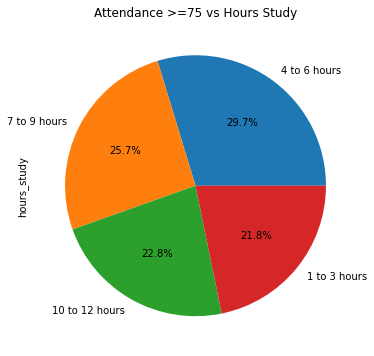

In [152]:
plt.figure(figsize=(10, 6))
attendance_vs_hours_study=df[df['attendance_percent']>=75]['hours_study'].value_counts(normalize=True).mul(100).sort_values(ascending=False)
attendance_vs_hours_study.plot(kind='pie',autopct='%1.1f%%')
plt.title('Attendance >=75 vs Hours Study')
plt.show()

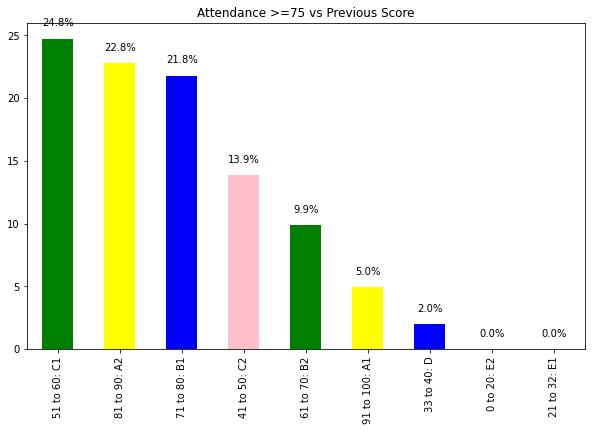

In [164]:
plt.figure(figsize=(10, 6))
color=['green','yellow','blue','pink']
attendance_vs_Previous_Score=df[df['attendance_percent']>=75]['previous_scores_range'].value_counts(normalize=True).mul(100).sort_values(ascending=False)
attendance_vs_Previous_Score.plot(kind='bar', color=color)
plt.title('Attendance >=75 vs Previous Score')

for i,val in enumerate(attendance_vs_Previous_Score):
    plt.text(i,val+1,f'{val:.1f}%',ha='center')
    
plt.show()

In [207]:
pd.crosstab(df['sleep_pattern'],df['exam_result'], normalize=True).mul(100)

exam_result,Passed,Failed
sleep_pattern,,
4 to 5 hours,8.0,10.0
6 to 7 hours,20.5,19.0
More than 7 hours,17.5,25.0


# Model Building

## Based on the factors we are predicting the exam_score (DV)

In [197]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,hours_study,sleep_pattern,previous_scores_range,exam_range,exam_result
0,S001,8.0,8.8,72.1,45,30.2,7 to 9 hours,More than 7 hours,41 to 50: C2,21 to 32: E1,Passed
1,S002,1.3,8.6,60.7,55,25.0,1 to 3 hours,More than 7 hours,51 to 60: C1,21 to 32: E1,Passed
2,S003,4.0,8.2,73.7,86,35.8,4 to 6 hours,More than 7 hours,81 to 90: A2,33 to 40: D,Failed
3,S004,3.5,4.8,95.1,66,34.0,4 to 6 hours,4 to 5 hours,61 to 70: B2,33 to 40: D,Failed
4,S005,9.1,6.4,89.8,71,40.3,10 to 12 hours,6 to 7 hours,71 to 80: B1,41 to 50: C2,Failed


In [263]:
x=df.drop(['exam_score','hours_study','sleep_pattern','previous_scores_range','exam_range','exam_result','student_id'],axis=1)
y=df['exam_score']

In [270]:
x.shape

(200, 4)

In [245]:
y.shape

(200,)

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [250]:
models={
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decison Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Bossting Regressor': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)

    print(f'{name}')
    print(f'MAE: {mae}')
    print(f'rmse: {rmse}')
    print(f'r2:{r2}')
    print('\n')
    

Linear Regression
MAE: 2.3108582358958336
rmse: 2.7859976074331216
r2:0.8537447137159515


Ridge
MAE: 2.3118726541364536
rmse: 2.7867883880330533
r2:0.8536616754127868


Lasso
MAE: 2.5842101709028915
rmse: 3.038139176336232
r2:0.826073633650794


Decison Tree Regressor
MAE: 4.1125
rmse: 4.932823734941276
r2:0.5414979432863327


Random Forest Regressor
MAE: 2.8814250000000015
rmse: 3.3060464568726213
r2:0.7940470589842489


Gradient Bossting Regressor
MAE: 2.957235310378605
rmse: 3.4920589184204878
r2:0.7702194740594033




In [265]:
from sklearn.model_selection import cross_val_score

LR=LinearRegression()

scores=cross_val_score(LR,x,y,cv=5,scoring='r2')

print('R2 score of each fold',scores)
print('Average of R2 score',scores.mean())

R2 score of each fold [0.79847262 0.82686954 0.8552843  0.85676892 0.80607486]
Average of R2 score 0.8286940493240357


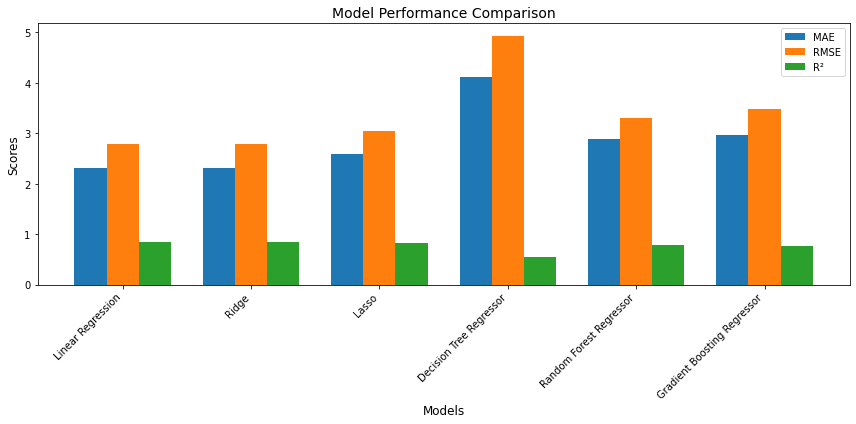

In [260]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with your model results
results = {
    'Model': [
        'Linear Regression',
        'Ridge',
        'Lasso',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor'
    ],
    'MAE': [2.3108, 2.3118, 2.5842, 4.1125, 2.8814, 2.9572],
    'RMSE': [2.7860, 2.7867, 3.0381, 4.9328, 3.3060, 3.4920],
    'R2': [0.8537, 0.8536, 0.8260, 0.5414, 0.7940, 0.7702]
}

df_results = pd.DataFrame(results)

# Plotting side-by-side bar charts
plt.figure(figsize=(12,6))
bar_width = 0.25
x = range(len(df_results))

plt.bar(x, df_results['MAE'], width=bar_width, label='MAE')
plt.bar([i + bar_width for i in x], df_results['RMSE'], width=bar_width, label='RMSE')
plt.bar([i + bar_width*2 for i in x], df_results['R2'], width=bar_width, label='R²')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks([i + bar_width for i in x], df_results['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [267]:
df.head(5)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,hours_study,sleep_pattern,previous_scores_range,exam_range,exam_result
0,S001,8.0,8.8,72.1,45,30.2,7 to 9 hours,More than 7 hours,41 to 50: C2,21 to 32: E1,Passed
1,S002,1.3,8.6,60.7,55,25.0,1 to 3 hours,More than 7 hours,51 to 60: C1,21 to 32: E1,Passed
2,S003,4.0,8.2,73.7,86,35.8,4 to 6 hours,More than 7 hours,81 to 90: A2,33 to 40: D,Failed
3,S004,3.5,4.8,95.1,66,34.0,4 to 6 hours,4 to 5 hours,61 to 70: B2,33 to 40: D,Failed
4,S005,9.1,6.4,89.8,71,40.3,10 to 12 hours,6 to 7 hours,71 to 80: B1,41 to 50: C2,Failed


### Predicting the New Exam Scores by giving the Random Input

In [273]:
LR=LinearRegression()
LR.fit(x,y)

new_data=pd.DataFrame({
    'hours_studied':[5],
    'sleep_hours':[6],
    'attendance_percent':[65],
    'previous_scores':[75]
})

predicted_score=LR.predict(new_data)
print(f'Predicted Exam Score by the Models: {predicted_score}')


Predicted Exam Score by the Models: [31.68946129]
